In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [69]:
dataset = pd.read_csv('N225.csv')
dataset = dataset.fillna(method = 'backfill')
msk = round(len(dataset) * 0.9)
dataset_train = dataset.iloc[0:msk]
dataset_test = dataset.iloc[msk:].reset_index(drop = True)

training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-14,21851.130859,21990.410156,21764.880859,21846.480469,21846.480469,75200.0
1,2018-11-15,21670.349609,21818.730469,21613.529297,21803.619141,21803.619141,0.0
2,2018-11-16,21804.900391,21873.740234,21663.990234,21680.339844,21680.339844,74900.0
3,2018-11-19,21679.029297,21852.919922,21665.289063,21821.160156,21821.160156,72100.0
4,2018-11-20,21582.689453,21687.119141,21526.949219,21583.119141,21583.119141,82500.0


In [79]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [82]:
X_train = []
y_train = []
for i in range(60, 219):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [84]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = "adam", loss = "mean_squared_error")

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 159 samples
Epoch 1/100
159/159 [==============================] - 17s 106ms/sample - loss: 0.2451
Epoch 2/100
159/159 [==============================] - 1s 8ms/sample - loss: 0.0598
Epoch 3/100
159/159 [==============================] - 1s 8ms/sample - loss: 0.0443
Epoch 4/100
159/159 [==============================] - 1s 9ms/sample - loss: 0.0316
Epoch 5/100
159/159 [==============================] - 1s 9ms/sample - loss: 0.0314
Epoch 6/100
159/159 [==============================] - 2s 13ms/sample - loss: 0.0251
Epoch 7/100
159/159 [==============================] - 2s 13ms/sample - loss: 0.0314
Epoch 8/100
159/159 [==============================] - 2s 10ms/sample - loss: 0.0266
Epoch 9/100
159/159 [==============================] - 2s 10ms/sample - loss: 0.0264
Epoch 10/100
159/159 [==============================] - 2s 11ms/sample - loss: 0.0264
Epoch 11/100
159/159 [==============================] - 2s 11ms/sample - loss: 0.0289
Epoch 12/100
159/159 [======================

159/159 [==============================] - 2s 13ms/sample - loss: 0.0109
Epoch 97/100
159/159 [==============================] - 2s 12ms/sample - loss: 0.0107
Epoch 98/100
159/159 [==============================] - 2s 11ms/sample - loss: 0.0114
Epoch 99/100
159/159 [==============================] - 2s 11ms/sample - loss: 0.0102
Epoch 100/100
159/159 [==============================] - 2s 12ms/sample - loss: 0.0097


In [125]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
real_stock_price = []
for i in range(60, 76):
    X_test.append(inputs[i - 60 : i, 0])
    real_stock_price.append(training_set_scaled[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = np.array(real_stock_price)
real_stock_price = np.reshape(real_stock_price, (real_stock_price.shape[0], 1))
real_stock_price = sc.inverse_transform(real_stock_price)

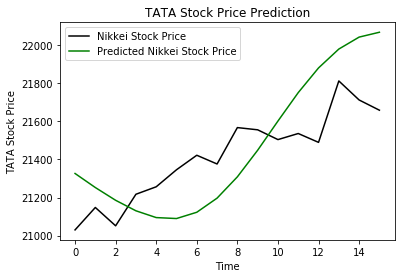

In [126]:
plt.plot(real_stock_price, color = "black", label = "Nikkei Stock Price")
plt.plot(predicted_stock_price, color = "green", label = "Predicted Nikkei Stock Price")
plt.title("TATA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TATA Stock Price")
plt.legend()
plt.show()